In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
hotel_data = pd.read_csv("hotel_bookings.csv")

In [90]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2.0,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3.0,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2.0,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2.0,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


### Check for missing values and handle them appropriately (e.g., imputation,dropping rows/columns).

In [91]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                              507
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [92]:
hotel_data['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [93]:
country_mode = hotel_data['country'].mode()[0]

In [94]:
hotel_data['country'].fillna(country_mode, inplace = True)

In [95]:
hotel_data['country'].isna().sum()

0

In [96]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 1
children                               4
babies                                 0
meal                                   0
country                                0
market_segment                         2
distribution_channel                   1
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        0
deposit_type                          21
agent                              16340
company         

In [97]:
children_mean = hotel_data['children'].mean()
children_mean

0.10388990333874994

In [98]:
hotel_data['children'].fillna(children_mean)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [99]:
adult_mean = hotel_data['adults'].mean()
adult_mean

1.856402181105462

In [100]:
hotel_data['adults'].fillna(adult_mean)

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: adults, Length: 119390, dtype: float64

In [101]:
hotel_data['market_segment'].fillna(hotel_data['market_segment'].mode()[0])

0                Direct
1                Direct
2                Direct
3             Corporate
4             Online TA
              ...      
119385    Offline TA/TO
119386        Online TA
119387        Online TA
119388        Online TA
119389        Online TA
Name: market_segment, Length: 119390, dtype: object

In [102]:
hotel_data['distribution_channel'].fillna(hotel_data['distribution_channel'].mode()[0])

0            Direct
1            Direct
2            Direct
3         Corporate
4             TA/TO
            ...    
119385        TA/TO
119386        TA/TO
119387        TA/TO
119388        TA/TO
119389        TA/TO
Name: distribution_channel, Length: 119390, dtype: object

In [103]:
hotel_data['reserved_room_type'].fillna(hotel_data['reserved_room_type'].mode()[0])

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119390, dtype: object

In [104]:
hotel_data[hotel_data['assigned_room_type'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1008,Resort Hotel,0,68,2015,August,33,10,1,2,2.0,...,No Deposit,96.0,NaN,0,Transient,254.0,1,1,Check-Out,13/08/2015


In [105]:
assigned_mode = hotel_data['assigned_room_type'].mode()[0]
hotel_data['assigned_room_type'].fillna(assigned_mode)

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 119390, dtype: object

In [106]:
deposit_type_mode = hotel_data['deposit_type'].mode()[0]
hotel_data['deposit_type'].fillna(deposit_type_mode, inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1063/766352389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['deposit_type'].fillna(deposit_type_mode, inplace = True)


In [107]:
hotel_data['agent'].fillna(hotel_data['agent'].mean())

0          86.693382
1          86.693382
2          86.693382
3         304.000000
4         240.000000
             ...    
119385    394.000000
119386      9.000000
119387      9.000000
119388     89.000000
119389      9.000000
Name: agent, Length: 119390, dtype: float64

In [108]:
del(hotel_data['company'])

In [109]:
type_mode = hotel_data['customer_type'].mode()[0]
hotel_data['customer_type'].fillna(type_mode,inplace = True)

/var/folders/_l/8qhtzvqj6m7_6t8xsrv7kc4c0000gn/T/ipykernel_1063/2418832381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['customer_type'].fillna(type_mode,inplace = True)


In [110]:
hotel_data.select_dtypes(include=['int64', 'float64'])


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2.0,0.0,0,0,0,0,3,NaN,0,0.00,0,0
1,0,737,2015,27,1,0,0,2.0,0.0,0,0,0,0,4,NaN,0,0.00,0,0
2,0,7,2015,27,1,0,1,1.0,0.0,0,0,0,0,0,NaN,0,75.00,0,0
3,0,13,2015,27,1,0,1,1.0,0.0,0,0,0,0,0,304.0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2.0,0.0,0,0,0,0,0,240.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2.0,0.0,0,0,0,0,0,394.0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3.0,0.0,0,0,0,0,0,9.0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2.0,0.0,0,0,0,0,0,9.0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2.0,0.0,0,0,0,0,0,89.0,0,104.40,0,0


In [111]:
print(hotel_data['is_canceled'].mean())
print(hotel_data['is_canceled'].median())
print(hotel_data['is_canceled'].std())

0.37041628277075134
0.0
0.4829182265925984


In [112]:
print(hotel_data['lead_time'].mean())
print(hotel_data['lead_time'].median())
print(hotel_data['lead_time'].std())

104.01141636652986
69.0
106.86309704798794


In [113]:
print(hotel_data['arrival_date_year'].mean())
print(hotel_data['arrival_date_year'].median())
print(hotel_data['arrival_date_year'].std())

2016.156554150264
2016.0
0.7074759445203559


In [114]:
print(hotel_data['agent'].mean())
print(hotel_data['agent'].median())
print(hotel_data['agent'].std())

86.69338185346919
14.0
110.77454764295149


In [115]:
x = hotel_data['arrival_date_year']
y = hotel_data['adults']


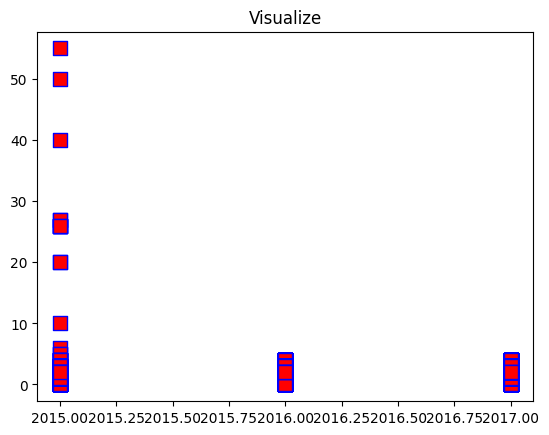

In [116]:
plt.figure()

plt.scatter(x,
            y, 
            c = 'red',
            s=100,
            marker ='s',
            edgecolor = 'blue')
plt.title("Visualize")
plt.show()

In [121]:
numerical_cols = [
    "lead_time", "stays_in_weekend_nights", "stays_in_week_nights", "adults",
    "children", "babies", "previous_cancellations", "previous_bookings_not_canceled",
    "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"
]
categorical_cols = [
    "hotel", "country", "market_segment", "distribution_channel", 
    "is_repeated_guest", "reserved_room_type", "assigned_room_type", "deposit_type",
    "agent", "customer_type", "reservation_status"
]

In [122]:
for col in categorical_cols:
    print(f"\n{col}:")
    print(hotel_data[col].value_counts())


hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

country:
country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

market_segment:
market_segment
Online TA        56477
Offline TA/TO    24217
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

distribution_channel:
distribution_channel
TA/TO        97869
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

is_repeated_guest:
is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

reserved_room_type:
reserved_room_type
A    85994
D    19200
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

assigned_room_type:
assigned_room_type
A    

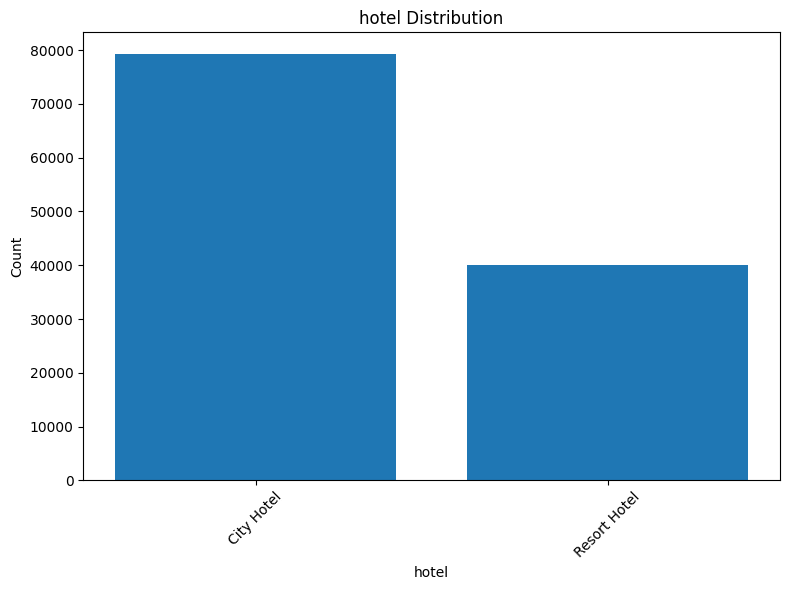

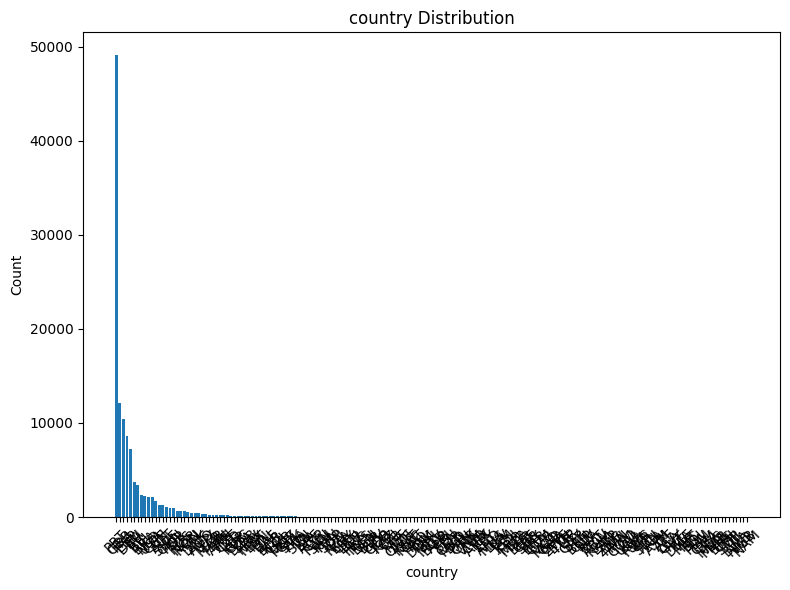

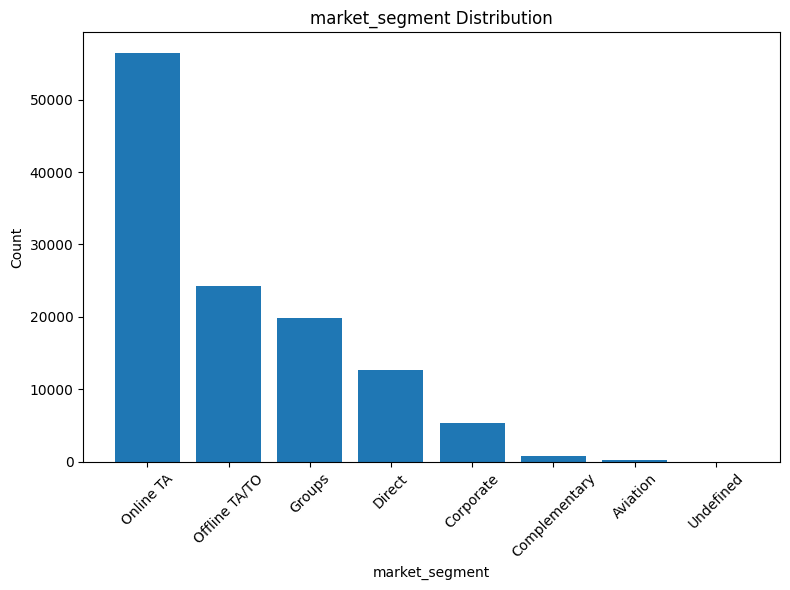

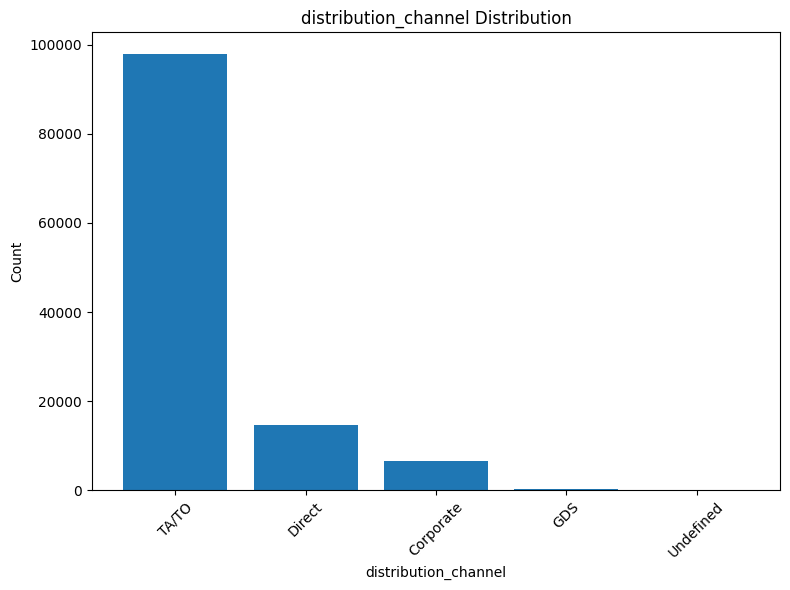

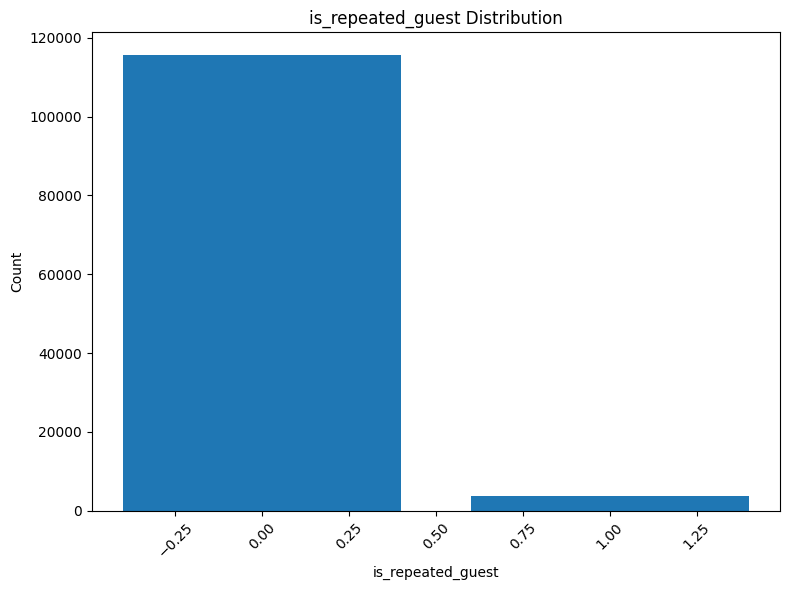

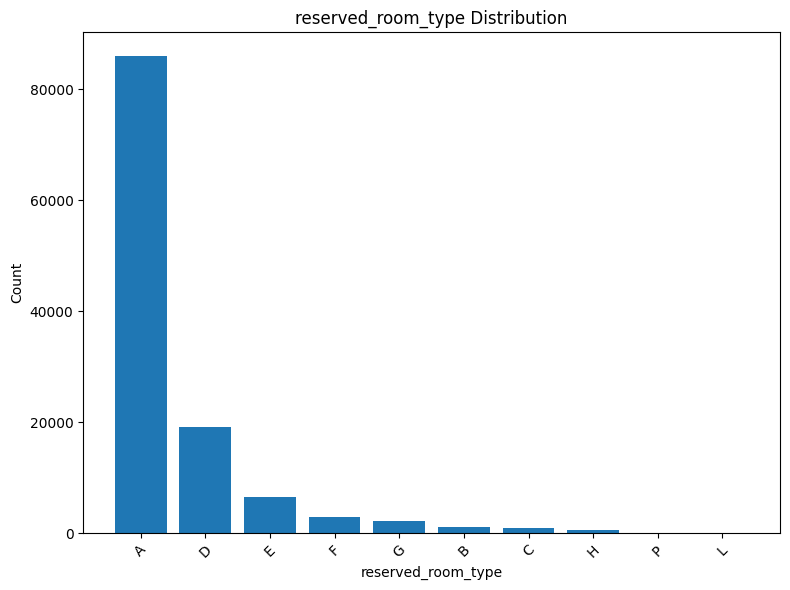

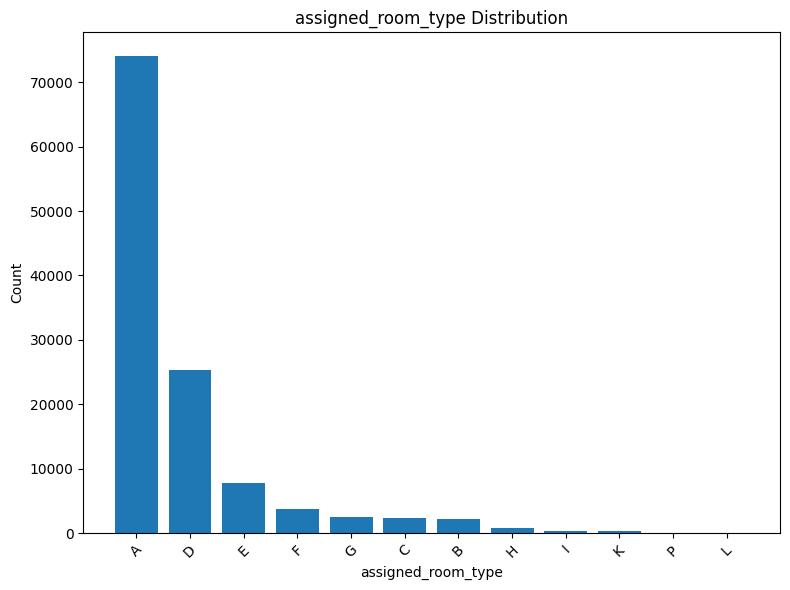

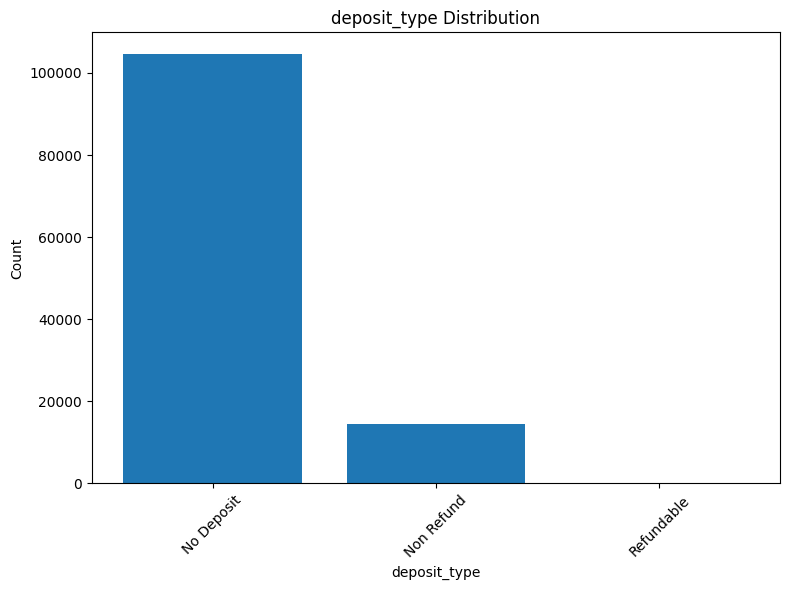

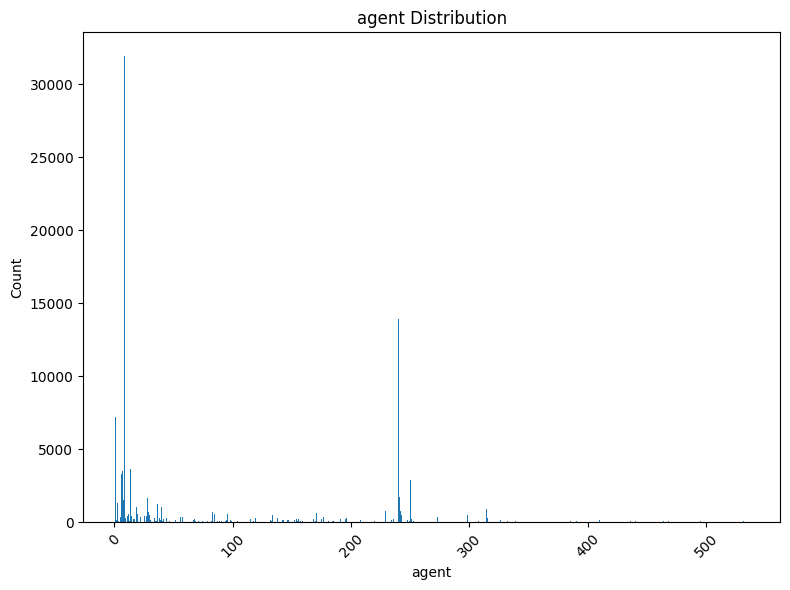

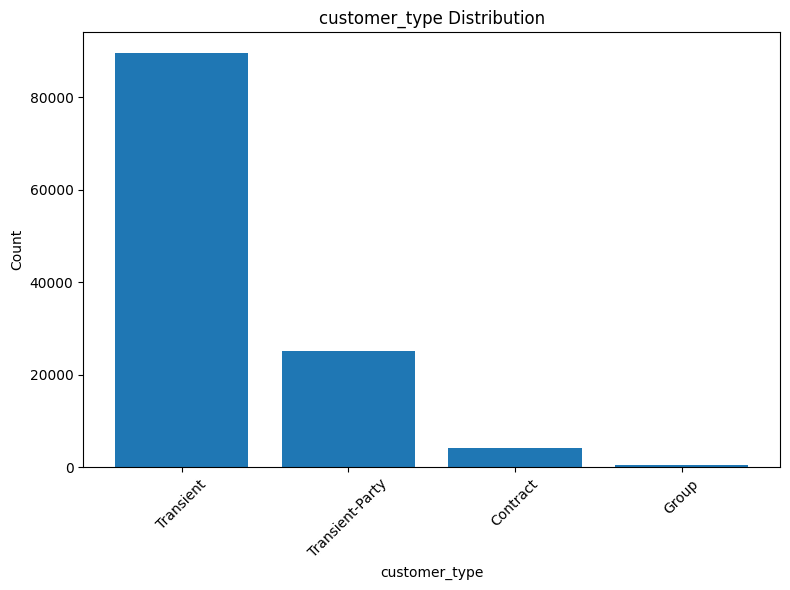

ValueError: 'label' must be of length 'x'

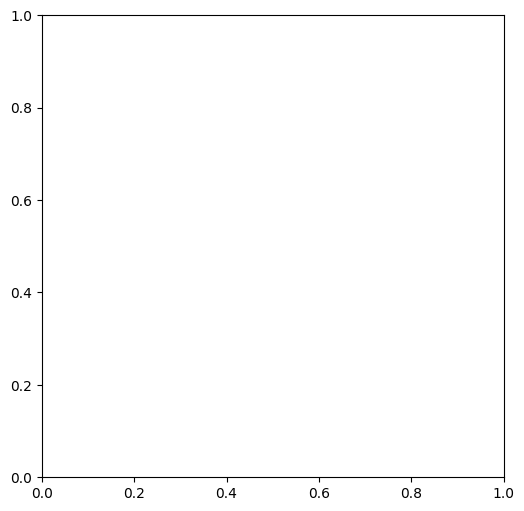

In [131]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    if col == "reservation_status":
        plt.pie(hotel_data[col].value_counts(), labels=hotel_data[col].unique(), autopct="%1.1f%%")
        plt.title(f"{col} Distribution")
    else: 
        plt.bar(hotel_data[col].value_counts().index, hotel_data[col].value_counts().values)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

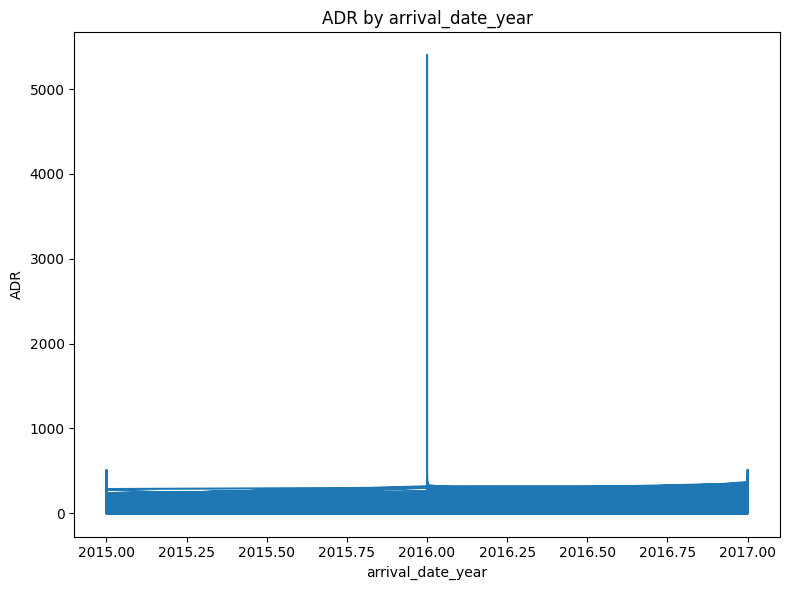

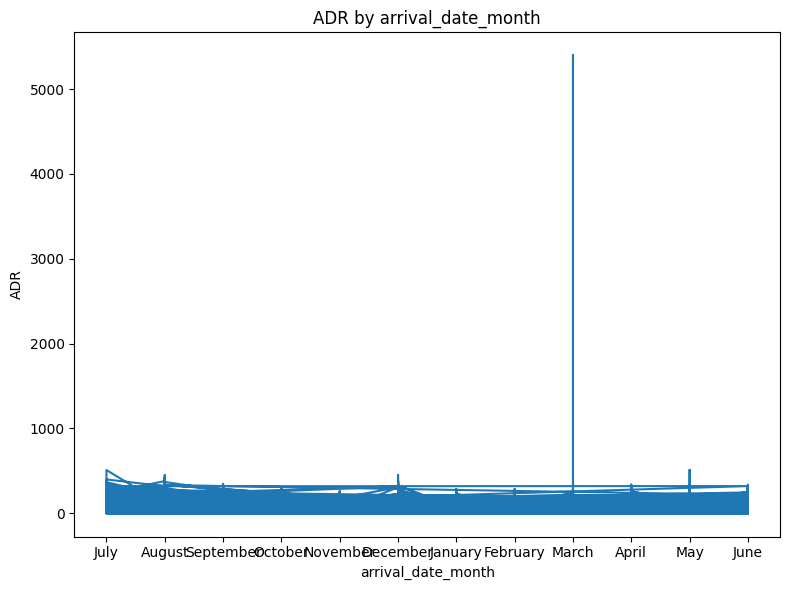

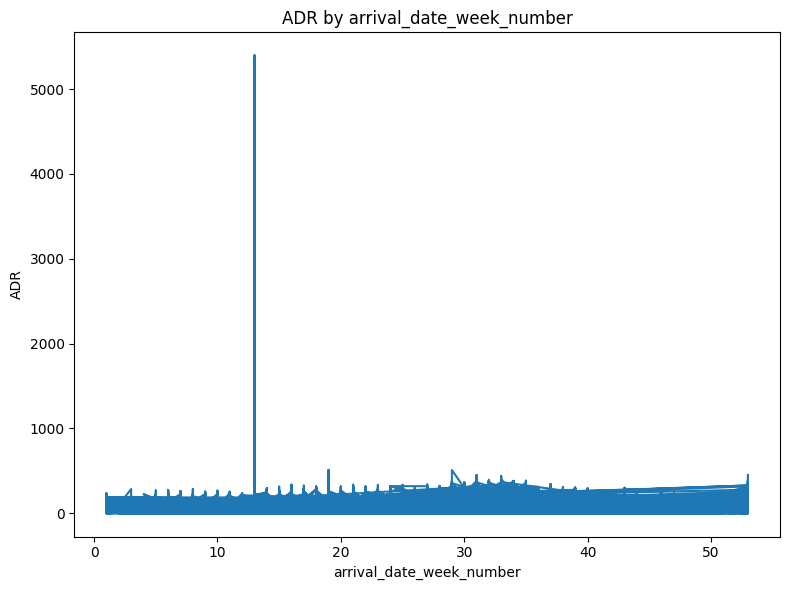

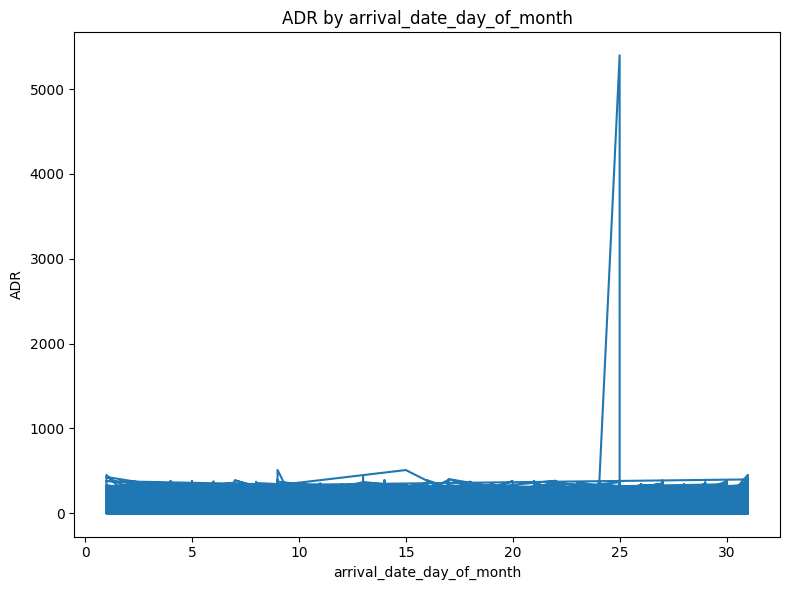

In [135]:
arrival_date_cols = ["arrival_date_year", "arrival_date_month", "arrival_date_week_number", "arrival_date_day_of_month"]
for col in arrival_date_cols:
    plt.figure(figsize=(8, 6))
    plt.plot(hotel_data[col], hotel_data["adr"]) 
    plt.xlabel(col)
    plt.ylabel("ADR")
    plt.title(f"ADR by {col}")
    plt.tight_layout()
    plt.show()

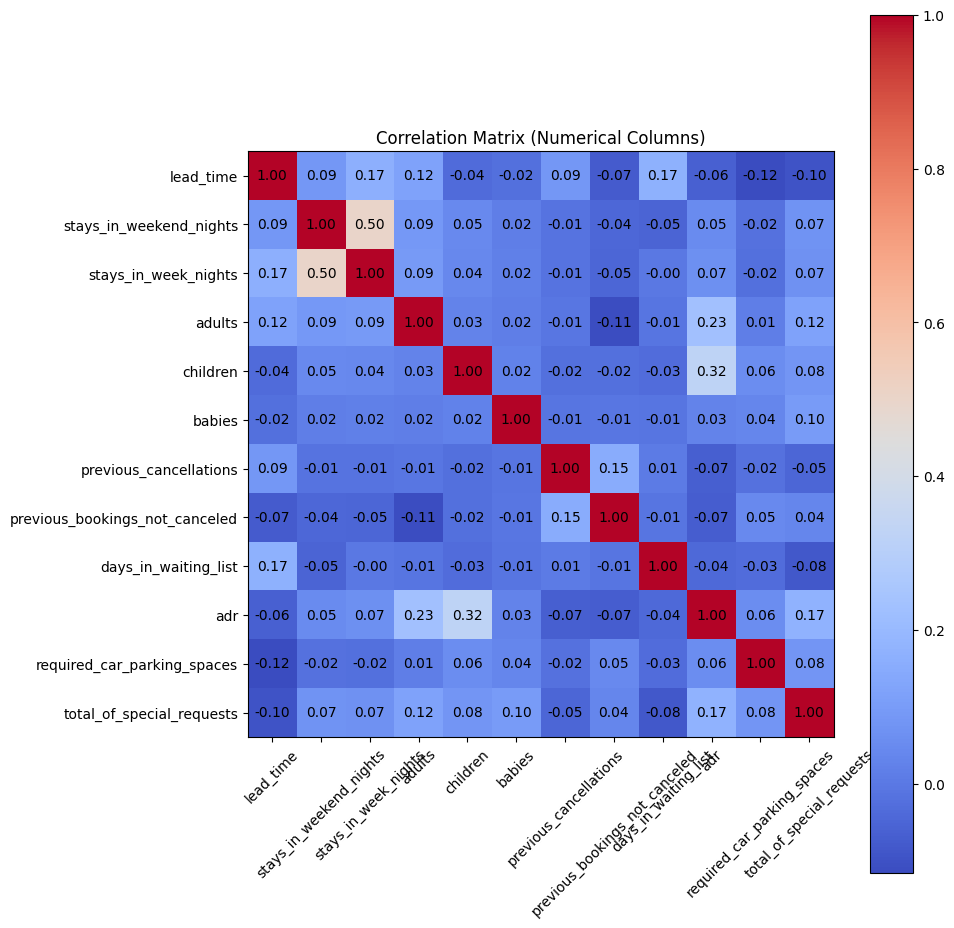

In [137]:
correlation_matrix = hotel_data[numerical_cols].corr()

# Visualize Correlation Matrix as Heatmap
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap="coolwarm")  
plt.colorbar() 

# Set labels for rows and columns (adjust as needed)
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(range(len(numerical_cols)), numerical_cols)


for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(i, j, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center")

plt.title("Correlation Matrix (Numerical Columns)")
plt.tight_layout()
plt.show()